In [3]:
from sympy import symbols, sqrt, Matrix, simplify, diff, init_printing, lambdify

# Enable LaTeX rendering in Jupyter
init_printing()

# Define variables
x1, x2, x3, x4, x5, x6, xc, yc, zc, r, k1, k2 = symbols('x1 x2 x3 x4 x5 x6 xc yc zc r k1 k2')
ux, uy, uz, u = symbols('ux uy uz u')

In [4]:
# Define h(x) function
h = sqrt((x1 - xc)**2 + (x2 - yc)**2 + (x3 - zc)**2) - r
# Define f(x) and g(x) as matrices
f = Matrix([x4, x5, x6, 0, 0, 0])
# g = Matrix([0, 0, 0, 1, 1, 1])
g = Matrix([
    [0, 0, 0],  # Position derivatives (p1, p2, p3) do not depend on control inputs
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0],  # Velocity derivatives (v1, v2, v3) depend on control inputs
    [0, 1, 0],
    [0, 0, 1]
])
u = Matrix([ux, uy, uz])
# Display h, f, and g
display(h)
display(f)
display(g)
display(f+g*u)

⎡x₄⎤
⎢  ⎥
⎢x₅⎥
⎢  ⎥
⎢x₆⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢1  0  0⎥
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

⎡x₄⎤
⎢  ⎥
⎢x₅⎥
⎢  ⎥
⎢x₆⎥
⎢  ⎥
⎢ux⎥
⎢  ⎥
⎢uy⎥
⎢  ⎥
⎣uz⎦

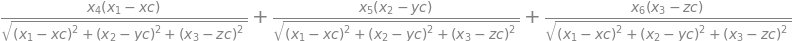

In [5]:
# Compute Lf(h) (Lie derivative of h along f)
Lf_h = sum(diff(h, x_i) * f[i] for i, x_i in enumerate([x1, x2, x3, x4, x5, x6]))
display(Lf_h)

In [6]:
# Compute Lgh (lie derivative of h along g)
Lg_h = sum(diff(h, x_i) * g[i] for i, x_i in enumerate([x1, x2, x3, x4, x5, x6]))
display(Lg_h)

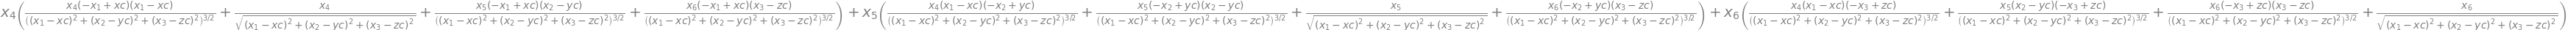

In [7]:
# Compute Lf2(h) (second Lie derivative along f)
Lf2_h = sum(diff(Lf_h, x_i) * f[i] for i, x_i in enumerate([x1, x2, x3, x4, x5, x6]))
display(Lf2_h)

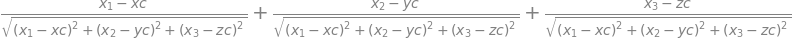

In [6]:
# Compute LgLf(h) (Lie derivative of Lf(h) along g)
Lg_Lf_h = sum(diff(Lf_h, x_i) * g[i] for i, x_i in enumerate([x1, x2, x3, x4, x5, x6]))
display(Lg_Lf_h)

In [7]:
h_func = lambdify((x1, xc, x2, yc, x3, zc, r), h)
f_func = lambdify((x4, x5, x6), f)
g_func = lambdify((), g)
Lf_h_func = lambdify((x1, xc, x2, yc, x3, zc, x4, x5, x6), Lf_h)
Lg_h_func = lambdify((), Lg_h)
Lf2_h_func = lambdify((x1, xc, x2, yc, x3, zc, x4, x5, x6), Lf2_h)
Lg_Lf_h_func = lambdify((x1, xc, x2, yc, x3, zc, x4, x5, x6), Lg_Lf_h)


In [9]:
_x1 = 0
_x2 = 0
_x3 = 0
_xc = 5
_yc = 5
_zc = 5
_r = 1.0
_x4 = 1.0
_x5 = 0.5
_x6 = 0.5

s1 = h_func(_x1, _xc, _x2, _yc, _x3, _zc, _r)
f_func(_x4, _x5, _x6)
g_func()
s5 = Lf_h_func(_x1, _xc, _x2, _yc, _x3, _zc, _x4, _x5, _x6)
s2 = Lg_h_func()
s3 = Lf2_h_func(_x1, _xc, _x2, _yc, _x3, _zc, _x4, _x5, _x6)
s4 = Lg_Lf_h_func(_x1, _xc, _x2, _yc, _x3, _zc, _x4, _x5, _x6)

display(s1, s2, s3, s4, s5)

In [10]:
test1 = s3 + s5*(0.5+0.5) + 0.5*0.5*s1
test2 = -s4

display(test1)
display(test2)